# K-Nearest Neighbors

## I. Giới thiệu

K lân cận (K-nearest neighbor hay KNN) là một trong những thuật toán học có giám sát đơn giản nhất. Khi huấn luyện, thuật toán này gần như không học một
điều gì từ dữ liệu huấn luyện mà ghi nhớ lại một cách máy móc toàn bộ dữ liệu đó. Mọi tính toán được thực hiện tại pha kiểm tra. KNN có thể được áp dụng
vào các bài toán phân loại và hồi quy. <br><br>
KNN là thuật toán đi tìm đầu ra của một điểm dữ liệu mới chỉ dựa trên thông
tin của K điểm dữ liệu gần nhất trong tập huấn luyện. <br><br>
Với KNN, mọi điểm trong tập huấn luyện đều được mô hình mô tả một cách
chính xác. Việc này khiến overfitting dễ xảy ra với KNN.

## II. Phân tích toán học

Không có hàm mất mát hay bài toán tối ưu nào cần thực hiện trong quá trìnhhuấn luyện KNN. Mọi tính toán được tiến hành ở bước kiểm tra. Vì KNN ra
quyết định dựa trên các điểm gần nhất. Vì vậy ta cần quan tâm 2 điều: Khoảng cách và tính toán khoảng cách sao cho hiệu quả.<br><br>
* Với vấn đề thứ nhất, mỗi điểm dữ liệu được thể hiện bằng một vector đặc trưng,
khoảng cách giữa hai điểm chính là khoảng cách giữa hai vector đó. Có nhiều
loại khoảng cách khác nhau tuỳ vào bài toán, nhưng khoảng cách được sử dụng
nhiều nhất là khoảng cách Euclid

* Vấn đề thứ hai cần được lưu tâm hơn, đặc biệt với các bài toán có tập huấn luyện
lớn và vector dữ liệu có kích thước lớn. Giả sử các vector huấn luyện là các cột
của ma trận $X$ $\in$ $\mathbb{R}^{d×N}$  với $d$ và $N$ lớn. KNN sẽ phải tính khoảng cách từ một điểm dữ liệu mới $z \in \mathbb{R}^d$ đến toàn bộ $N$ điểm dữ liệu đã cho và chọn ra $K$ khoảng cách nhỏ nhất. Nếu không có cách tính hiệu quả, khối lượng tính toán sẽ rất lớn.

### 1.Khoảng cách từ một điểm tới từng điểm trong một tập hợp

Khoảng cách Euclid từ một điểm $z$ đến một điểm $x_i$ trong tập huấn luyện được định nghĩa bởi $||z - x_i||_2$. Người ta thường bình phương khoảng cách để tránh phép tính căn bậc 2. Việc bình phương không ảnh hưởng đến thứ tự của khoảng cách. <br>
Khai triển: <br>
$$||z - x_i||_2^2 = (z - x_i)^T(z - x_i) = ||z||_2^2 + ||x_i||_2^2 - 2x_i^Tz \tag{1}$$
Để tìm ra $x_i$ gần $z$ nhất ta có thể bỏ qa số hạng đầu. Nếu có nhiều điểm dữ liệu trong tập kiểm tra thì $||x_i||_2^2$ có thể được tính trước và lưu vào bộ nhớ. Sau đó ta chỉ việc <i>tính tích vô hướng</i> của $x_i^Tz$

#### Ví dụ với Python

Trước hết, chọn $d$ và $N$ là các giá trị lớn và khai báo ngẫu nhiên $X$ và $z$. Lưu ý, chiều thứ nhất thường là thứ tự của điểm dữ liệu

In [45]:
import numpy as np
from time import time #Để so sánh tốc độ chạy
np.random.seed(7)
d, N = 1000, 10000 #Chiều, số điểm dữ liệu trong tập huấn luyện
X = np.random.randn(N, d) #Random ma trận N dòng d cột
z = np.random.randn(d)
X.shape, z.shape

((10000, 1000), (1000,))

Tiếp theo ta viết ba hàm số <br>
* a. dist_pp($z$, $x$) tính bình phương khoảng cách Euclid giữa $z$ và $x$. Hàm này lấy $z - x$ rồi bình phương chuẩn 2 của nó
* b.dist_ps_naive($z$, $X$) tính bình phương khoảng cách giữa $z$ và mỗi hàng của $X$. Trong hàm này, các khoảng cách được xây dựng dựa trên việc tính từng giá
trị dist_pp($z$, $X[i]$).
* c.dist_ps_fast($z$, $X$) tính bình phương khoảng cách giữa $z$ và mỗi hàng của $X$, tuy nhiên, kết quả được tính dựa trên đẳng thức (1). Ta cần tính tổng bình phương các phần tử của mỗi điểm dữ liệu trong $X$ và tính tích vô hướng $X \cdot z$


In [46]:
def dist_pp(z, x):
    d = z - x.reshape(z.shape) # để z và x có cùng chiều
    return np.sum(d * d)

# Từ một điểm đến các điểm trong tập hợp, naive
def dist_ps_naive(z, X):
    N = X.shape[0]
    res = np.zeros((1, N))
    for i in range (N):
        res[0][i] = dist_pp(z, X[i])
    return res

# Từ một điểm đến các điểm trong tập hợp, fast
def dist_ps_fast(z, X):
    X2 = np.sum(X*X, 1) # bình phương chuẩn 2 của X
    z2 = np.sum(z*z) # bình phương chuẩn 2 của z
    return X2 + z2 - 2*(X@z)

t1 = time()
D1 = dist_ps_naive(z, X)

print('Naive point 2 set, running time: {} s'.format(time() - t1))

t1 = time()
D2 = dist_ps_fast(z, X)
print('Fast point 2 set, running time: {} s'.format(time() - t1))
print('Result Difference: {}'.format(np.linalg.norm(D1 - D2)))

Naive point 2 set, running time: 0.12208151817321777 s
Fast point 2 set, running time: 0.06885838508605957 s
Result Difference: 2.3518616793012143e-11


Kết quả là tốc độ của cách 2 nhanh hơn gấp đôi cách 1. Tỉ lệ này còn lớn hơn khi kích thước dữ liệu tăng lên và $||x_i||_2^2$ được tính từ trước. Quan trọng hơn sự chênh lệch 2 hàm nhỏ dẫn đến cách 2 được ưu tiên hơn

### 2. Khoảng cách giữa từng cặp điểm trong hai tập hợp

Thông thường, tập kiểm tra bao gồm nhiều điểm dữ liệu tạo thành một ma trận $Z$. Ta phải tính từng cặp khoảng cách giữa mỗi điểm trong tập kiểm tra và một
điểm trong tập huấn luyện. Nếu mỗi tập có 1000 phần tử, có một triệu khoảng cách cần tính. Nếu không có phương pháp tính hiệu quả, thời gian thực hiện sẽ
rất dài.

Đoạn code 1 sử dụng dòng for để tính khoảng cách từng điểm trong tập thứ nhất đến tất cả điểm trong tập thứ hai thông qua hàm dist_ps_fast(). Đoạn code thứ 2 là dùng công thức (1).

In [47]:
Z = np.random.randn(100, d)
def dist_ss_0(Z, X):
    M, N = Z.shape[0], X.shape[0]
    res = np.zeros((M, N))
    for i in range(M):
        res[i] = dist_ps_fast(Z[i], X)
    return res
#----------------------------------------------------------------
def dist_ss_fast(Z, X):
    X2 = np.sum(X*X, 1) # square of l2 norm of each ROW of X
    Z2 = np.sum(Z*Z, 1) # square of l2 norm of each ROW of Z
    return Z2.reshape(-1, 1) + X2.reshape(1, -1) - 2*(Z @ X.T)
#----------------------------------------------------------------
t1 = time()
D3 = dist_ss_0(Z, X)
print('half fast set2set running time:', time() - t1, 's')
t1 = time()
D4 = dist_ss_fast(Z, X)
print('fast set2set running time', time() - t1, 's')
print('Result difference:', np.linalg.norm(D3 - D4))


half fast set2set running time: 4.432574272155762 s
fast set2set running time 0.09580111503601074 s
Result difference: 9.627147486217651e-11


## III. Ví dụ trên cơ sở dữ liệu Iris

Bộ dữ liệu hoa Iris là một bộ dữ liệu nhỏ. Bộ dữ liệu này bao gồm thông tin của ba nhãn hoa Iris khác nhau. Mỗi nhãn chứa thông tin của 50 bông hoa với dữ liệu là bốn thông tin: chiều dài, chiều rộng đài hoa, và chiều dài, chiều rộng cánh hoa. Chú ý rằng các điểm dữ liệu không phải là các
bức ảnh mà chỉ là một vector đặc trưng bốn chiếu gồm các thông tin ở trên.

In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()
X = iris.data
y = iris.target

In [49]:
#split dataset to tranning set and test set
print('Labels:', np.unique(y))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=130, random_state=7)
print(f"Training size: {X_train.shape[0]}, test size: {X_test.shape[0]:}")

Labels: [0 1 2]
Training size: 20, test size: 130


* Fit model với K = 1

In [55]:
model = KNeighborsClassifier(n_neighbors=1, p = 2, metric= 'minkowski') #p = 2 là chuẩn 2
model.fit(X_train, y_train)
np.printoptions(precision=2)
y_pred = model.predict(X_test)
print(f"Accuracy of 1NN: {100*accuracy_score(y_test, y_pred):.2f} %")

Accuracy of 1NN: 92.31 %


* Fit model với K = 7

In [56]:
model2 = KNeighborsClassifier(n_neighbors=7, p = 2, metric= 'minkowski') #p = 2 là chuẩn 2
model2.fit(X_train, y_train)
np.printoptions(precision=2)
y_pred = model2.predict(X_test)
print(f"Accuracy of 7NN: {100*accuracy_score(y_test, y_pred):.2f} %")

Accuracy of 7NN: 93.85 %


Nhận thấy rằng khi sử dụng nhiều điểm lân cận hơn, độ chính xác đã tăng lên.
Phương pháp dựa trên đa số trong lân cận còn được gọi là bầu chọn đa số.


### Đánh trọng số cho các điểm lân cận

Trong kỹ thuật bầu chọn đa số phía trên, các điểm trong bảy điểm gần nhất đều có vai trò như nhau và giá trị “lá phiếu” của mỗi điểm này cũng như nhau. Cách
bầu chọn này có thể thiếu công bằng vì các điểm gần hơn nên có tầm ảnh hưởng lớn hơn. Để thực hiện việc này, ta chỉ cần đánh trọng số khác nhau cho từng điểm trong bảy điểm gần nhất này. Cách đánh trọng số phải thoả mãn điều kiện điểm lân cận hơn được đánh trọng số cao hơn. Vậy ta chỉ cần lấy trọng số là nghịch đảo khoảng cách. <br>

Để thực hiện việc này trong scikit-learn, ta chỉ cần gán weights = ’distance’. Giá
trị mặc định của weights là ’uniform’, tương ứng với việc coi tất cả các điểm lân
cận có giá trị bằng nhau như trong bầu chọn đa số.


In [58]:
model3 = KNeighborsClassifier(n_neighbors=7, p = 2, metric='minkowski', weights='distance')
model3.fit(X_train, y_train)
y_pred = model3.predict(X_test)

print(f"Accuracy of 7NN (1/distance weights): {100*accuracy_score(y_test, y_pred):.2f} %")

Accuracy of 7NN (1/distance weights): 94.62 %


Độ chính xác tiếp tục tăng lên

### KNN với trọng số tự định nghĩa

Ngoài hai cách đánh trọng số weights = ‘uniform’ và weights = ‘distance’, scikit-learn còn cung cấp cách đánh trọng số tùy chọn. Ví dụ, một cách đánh trọng số phổ biến khác thường được dùng là:
$$w_i = exp\left( \frac{- ||z - x_i||_2^2}{\sigma ^ 2} \right)$$
Trong đó $w_i$ là trọng số của điểm gần thứ $i\ (x_i)$ của điểm dữ liệu đang xét $z, \sigma$ là một số dương. Hàm số này thỏa điều kiện điểm cần $x$ thì trọng số càng cao (cao nhất bằng 1)

In [59]:
def myweight(distances):
    sigma2 = .4 # chúng ta có thể đổi giá trị này
    return np.exp(-distances**2/sigma2)

model = KNeighborsClassifier(n_neighbors=7, p=2, weights=myweight)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f"Accuracy of 7NN (customized weights): {100*accuracy_score(y_test, y_pred):.2f} %")

Accuracy of 7NN (customized weights): 95.38 %


### K Nearest Neighbor regression

Nguồn trên sklearn

#### Generate sample data

In [65]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import neighbors

np.random.seed(0)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
T = np.linspace(0, 5, 500)[:, np.newaxis]
y = np.sin(X).ravel()

# Add noise to targets
y[::5] += 1 * (0.5 - np.random.rand(8))

#### Fit regression model

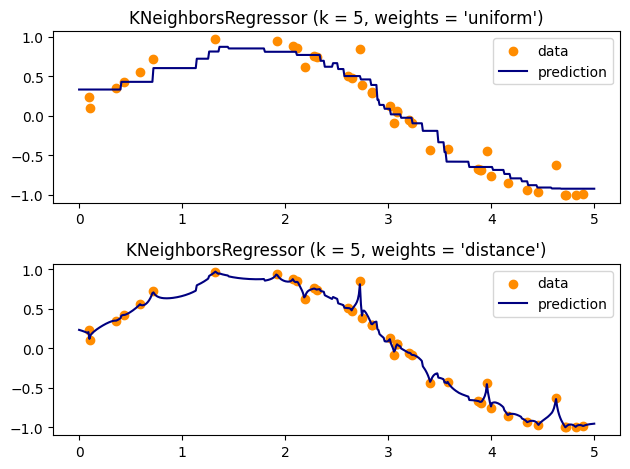

In [66]:
n_neighbors = 5

for i, weights in enumerate(["uniform", "distance"]):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    y_ = knn.fit(X, y).predict(T)

    plt.subplot(2, 1, i + 1)
    plt.scatter(X, y, color="darkorange", label="data")
    plt.plot(T, y_, color="navy", label="prediction")
    plt.axis("tight")
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors, weights))

plt.tight_layout()
plt.show();

## IV. Thảo luận

#### Ưu điểm:
* Độ phức tạp tính toán của quá trình huấn luyện gần như bằng 0. Việc tính bình phương chuẩn 2 của mỗi điểm dữ liệu huấn luyện có thể được thực hiện
trước trong bước này.
* Việc dự đoán kết quả của dữ liệu mới tương đối đơn giản sau khi đã xác định
được các điểm lân cận.
* KNN không không cần giả sử về phân phối của từng nhãn.
#### Nhược điểm:
* KNN nhạy cảm với nhiễu khi K nhỏ.
* Khi sử dụng KNN, phần lớn tính toán nằm ở pha kiểm tra. Trong đó việc
tính khoảng cách tới từng điểm dữ liệu huấn luyện tốn nhiều thời gian, đặc
biệt là với các cơ sở dữ liệu có số chiều lớn và có nhiều điểm dữ liệu. K càng
lớn thì độ phức tạp càng cao. Ngoài ra, việc lưu toàn bộ dữ liệu trong bộ nhớ
cũng ảnh hưởng tới hiệu năng của KNN.
